In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import re
import warnings
import random
import matplotlib
from tqdm.notebook import tqdm
from matplotlib.patches import Patch
from scipy.stats import linregress, spearmanr
import analysis_utils 
from copy import deepcopy
import importlib

# path to repository folder (data is stored here as well)
path = '..'
preds_loc = os.path.join(path, 'data', 'analysis', 'ssym_analysis.csv')

# default plotting settings
font = {'size'   : 18}
matplotlib.rc('font', **font)

# notebook display options
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300

remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

db = pd.read_csv(preds_loc).set_index(['direction', 'uid', 'uid2'])
db

ACDC-NN  ACDC-NN-Seq  Cartddg  DDG  DDGun  \
direction uid       uid2                                                    
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00 -1.6    0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74  1.6   -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22 -1.9    0.2   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98  1.9   -0.2   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00 -3.9    1.1   
...                                 ...          ...      ...  ...    ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56  5.0    4.5   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00 -5.7   -2.1   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24  5.7    2.1   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00 -6.9   -5.3   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98  6.9    5.3   

                               DDGun3D   DUET  Dynamut  Dynamut2   Evo  ...  \
direction uid       uid2                                                ...   
dir       1AMQ_191F 1AMQ_180F      0.9 -0.992    0.800     -1.34 -0.43  ...   
inv       1AMQ_191F 1AMQ_180F     -1.0 -1.735   -0.727     -2.07 -0.16  ...   
dir       1AMQ_191S 1AMQ_180S     -0.5 -1.717   -0.149     -2.18 -1.18  ...   
inv       1AMQ_191S 1AMQ_180S      0.4 -0.375    1.315     -1.60  0.92  ...   
dir       1AMQ_191W 1AMQ_180W      1.0 -1.495    1.222     -1.75  0.24  ...   
...                                ...    ...      ...       ...   ...  ...   
inv       5PTI_35G  5PTI_35G       3.6 -1.774    1.082     -0.55  0.81  ...   
dir       5PTI_43G  5PTI_43G      -1.9 -2.580   -1.420     -3.05 -3.00  ...   
inv       5PTI_43G  5PTI_43G       1.5 -0.450    1.228     -0.56  1.96  ...   
dir       5PTI_45A  5PTI_45A      -4.4 -3.734   -3.474     -3.22 -3.35  ...   
inv       5PTI_45A  5PTI_45A       3.7 -1.081    1.243     -0.88  2.10  ...   

                               K1566_pslm_rfa_2  K1566_pslm_rfa_3  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.359377         -1.293329   
inv       1AMQ_191F 1AMQ_180F          1.462469          1.326097   
dir       1AMQ_191S 1AMQ_180S         -0.775729         -1.182174   
inv       1AMQ_191S 1AMQ_180S          1.444899          1.793523   
dir       1AMQ_191W 1AMQ_180W         -1.166370         -1.399397   
...                                         ...               ...   
inv       5PTI_35G  5PTI_35G           1.505170          1.604247   
dir       5PTI_43G  5PTI_43G          -1.970451         -1.829165   
inv       5PTI_43G  5PTI_43G           2.203682          1.994945   
dir       5PTI_45A  5PTI_45A          -2.143016         -2.471057   
inv       5PTI_45A  5PTI_45A           2.317009          2.576291   

                               K1566_pslm_rfa_4  K1566_pslm_rfa_5  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.167028         -1.319135   
inv       1AMQ_191F 1AMQ_180F          1.614454          1.299031   
dir       1AMQ_191S 1AMQ_180S         -1.061680         -1.226272   
inv       1AMQ_191S 1AMQ_180S          1.831590          1.458851   
dir       1AMQ_191W 1AMQ_180W         -1.224691         -1.353090   
...                                         ...               ...   
inv       5PTI_35G  5PTI_35G           1.000641          0.788053   
dir       5PTI_43G  5PTI_43G          -1.900725         -2.070155   
inv       5PTI_43G  5PTI_43G           2.448100          2.162757   
dir       5PTI_45A  5PTI_45A          -2.620447         -2.705705   
inv       5PTI_45A  5PTI_45A           3.053840          2.735279   

                               K1566_pslm_rfa_6  K1566_pslm_rfa_7  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.277488         -1.195812   

Original unique mutations: 684
['K1566_pslm_rfa_1', 'K1566_pslm_rfa_2', 'K1566_pslm_rfa_3', 'K1566_pslm_rfa_4', 'K1566_pslm_rfa_5', 'K1566_pslm_rfa_6', 'K1566_pslm_rfa_7', 'K1566_pslm_rfa_8', 'K1566_pslm_rfa_9', 'K1566_pslm_rfa_10', 'K1566_pslm_rfa_11']
['ACDC-NN', 'ACDC-NN-Seq', 'Cartddg', 'DDGun', 'DDGun3D', 'DUET', 'Dynamut2', 'Evo', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq', 'INPS-Seq', 'INPS3D', 'KORPM', 'MAESTRO', 'MUpro', 'PremPS', 'SAAFEC-SEQ', 'SDM', 'ThermoNet', 'ankh', 'cartesian_ddg', 'esm1v_mean', 'esm1v_median', 'esm2_150M', 'esm2_15B_half', 'esm2_3B', 'esm2_650M', 'esmif_multimer', 'mCSM', 'mif', 'mifst', 'mpnn_10_00', 'mpnn_20_00', 'mpnn_30_00', 'msa_transformer_mean', 'msa_transformer_median', 'mutcomputex', 'stability-oracle', 'tranception', 'tranception_weights', 'ACDCNN']
cluster
1       8
2      28
3       6
4      56
5       6
6       2
7     368
8     150
9       4
10     10
11     36
12     10
Name: ACDC-NN, dtype: int64
Detected 6 interface mutations
Unique mut

ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET  Dynamut2   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F -0.992     -1.34 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735     -2.07 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717     -2.18 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375     -1.60  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495     -1.75  0.24 -6.466620         0.09   
...                              ...       ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774     -0.55  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580     -3.05 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450     -0.56  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734     -3.22 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081     -0.88  2.10  3.440730        -0.77   

                               ...  K1566_pslm_rfa_8  K1566_pslm_rfa_9  \
direction uid       uid2       ...                                       
dir       1AMQ_191F 1AMQ_180F  ...         -1.212911         -1.212911   
inv       1AMQ_191F 1AMQ_180F  ...          1.341369          1.341369   
dir       1AMQ_191S 1AMQ_180S  ...         -1.155710         -1.155710   
inv       1AMQ_191S 1AMQ_180S  ...          1.487895          1.487895   
dir       1AMQ_191W 1AMQ_180W  ...         -1.272449         -1.272449   
...                            ...               ...               ...   
inv       5PTI_35G  5PTI_35G   ...          0.822371          0.822371   
dir       5PTI_43G  5PTI_43G   ...         -2.177961         -2.177961   
inv       5PTI_43G  5PTI_43G   ...          2.228523          2.228523   
dir       5PTI_45A  5PTI_45A   ...         -2.814138         -2.814138   
inv       5PTI_45A  5PTI_45A   ...          2.854823          2.854823   

                               K1566_pslm_rfa_10  K1566_pslm_rfa_11  ddG  \
direction uid       uid2                                                   
dir       1AMQ_191F 1AMQ_180F          -1.212911          -1.227287 -1.6   
inv       1AMQ_191F 1AMQ_180F           1.341369           1.314434  1.6   
dir       1AMQ_191S 1AMQ_180S          -1.155710          -1.161543 -1.9   
inv       1AMQ_191S 1AMQ_180S           1.487895           1.509231  1.9   
dir       1AMQ_191W 1AMQ_180W          -1.272449          -1.363938 -3.9   
...                                          ...                ...  ...   
inv       5PTI_35G  5PTI_35G            0.822371           0.839321  5.0   
dir       5PTI_43G  5PTI_43G           -2.177961          -2.136175 -5.7   
inv       5PTI_43G  5PTI_43G            2.228523           2.244871  5.7   
dir       5PTI_45A  5PTI_45A           -2.814138          -2.781779 -6.9   
inv       5PTI_45A  5PTI_45A            2.854823           2.770453  6.9   

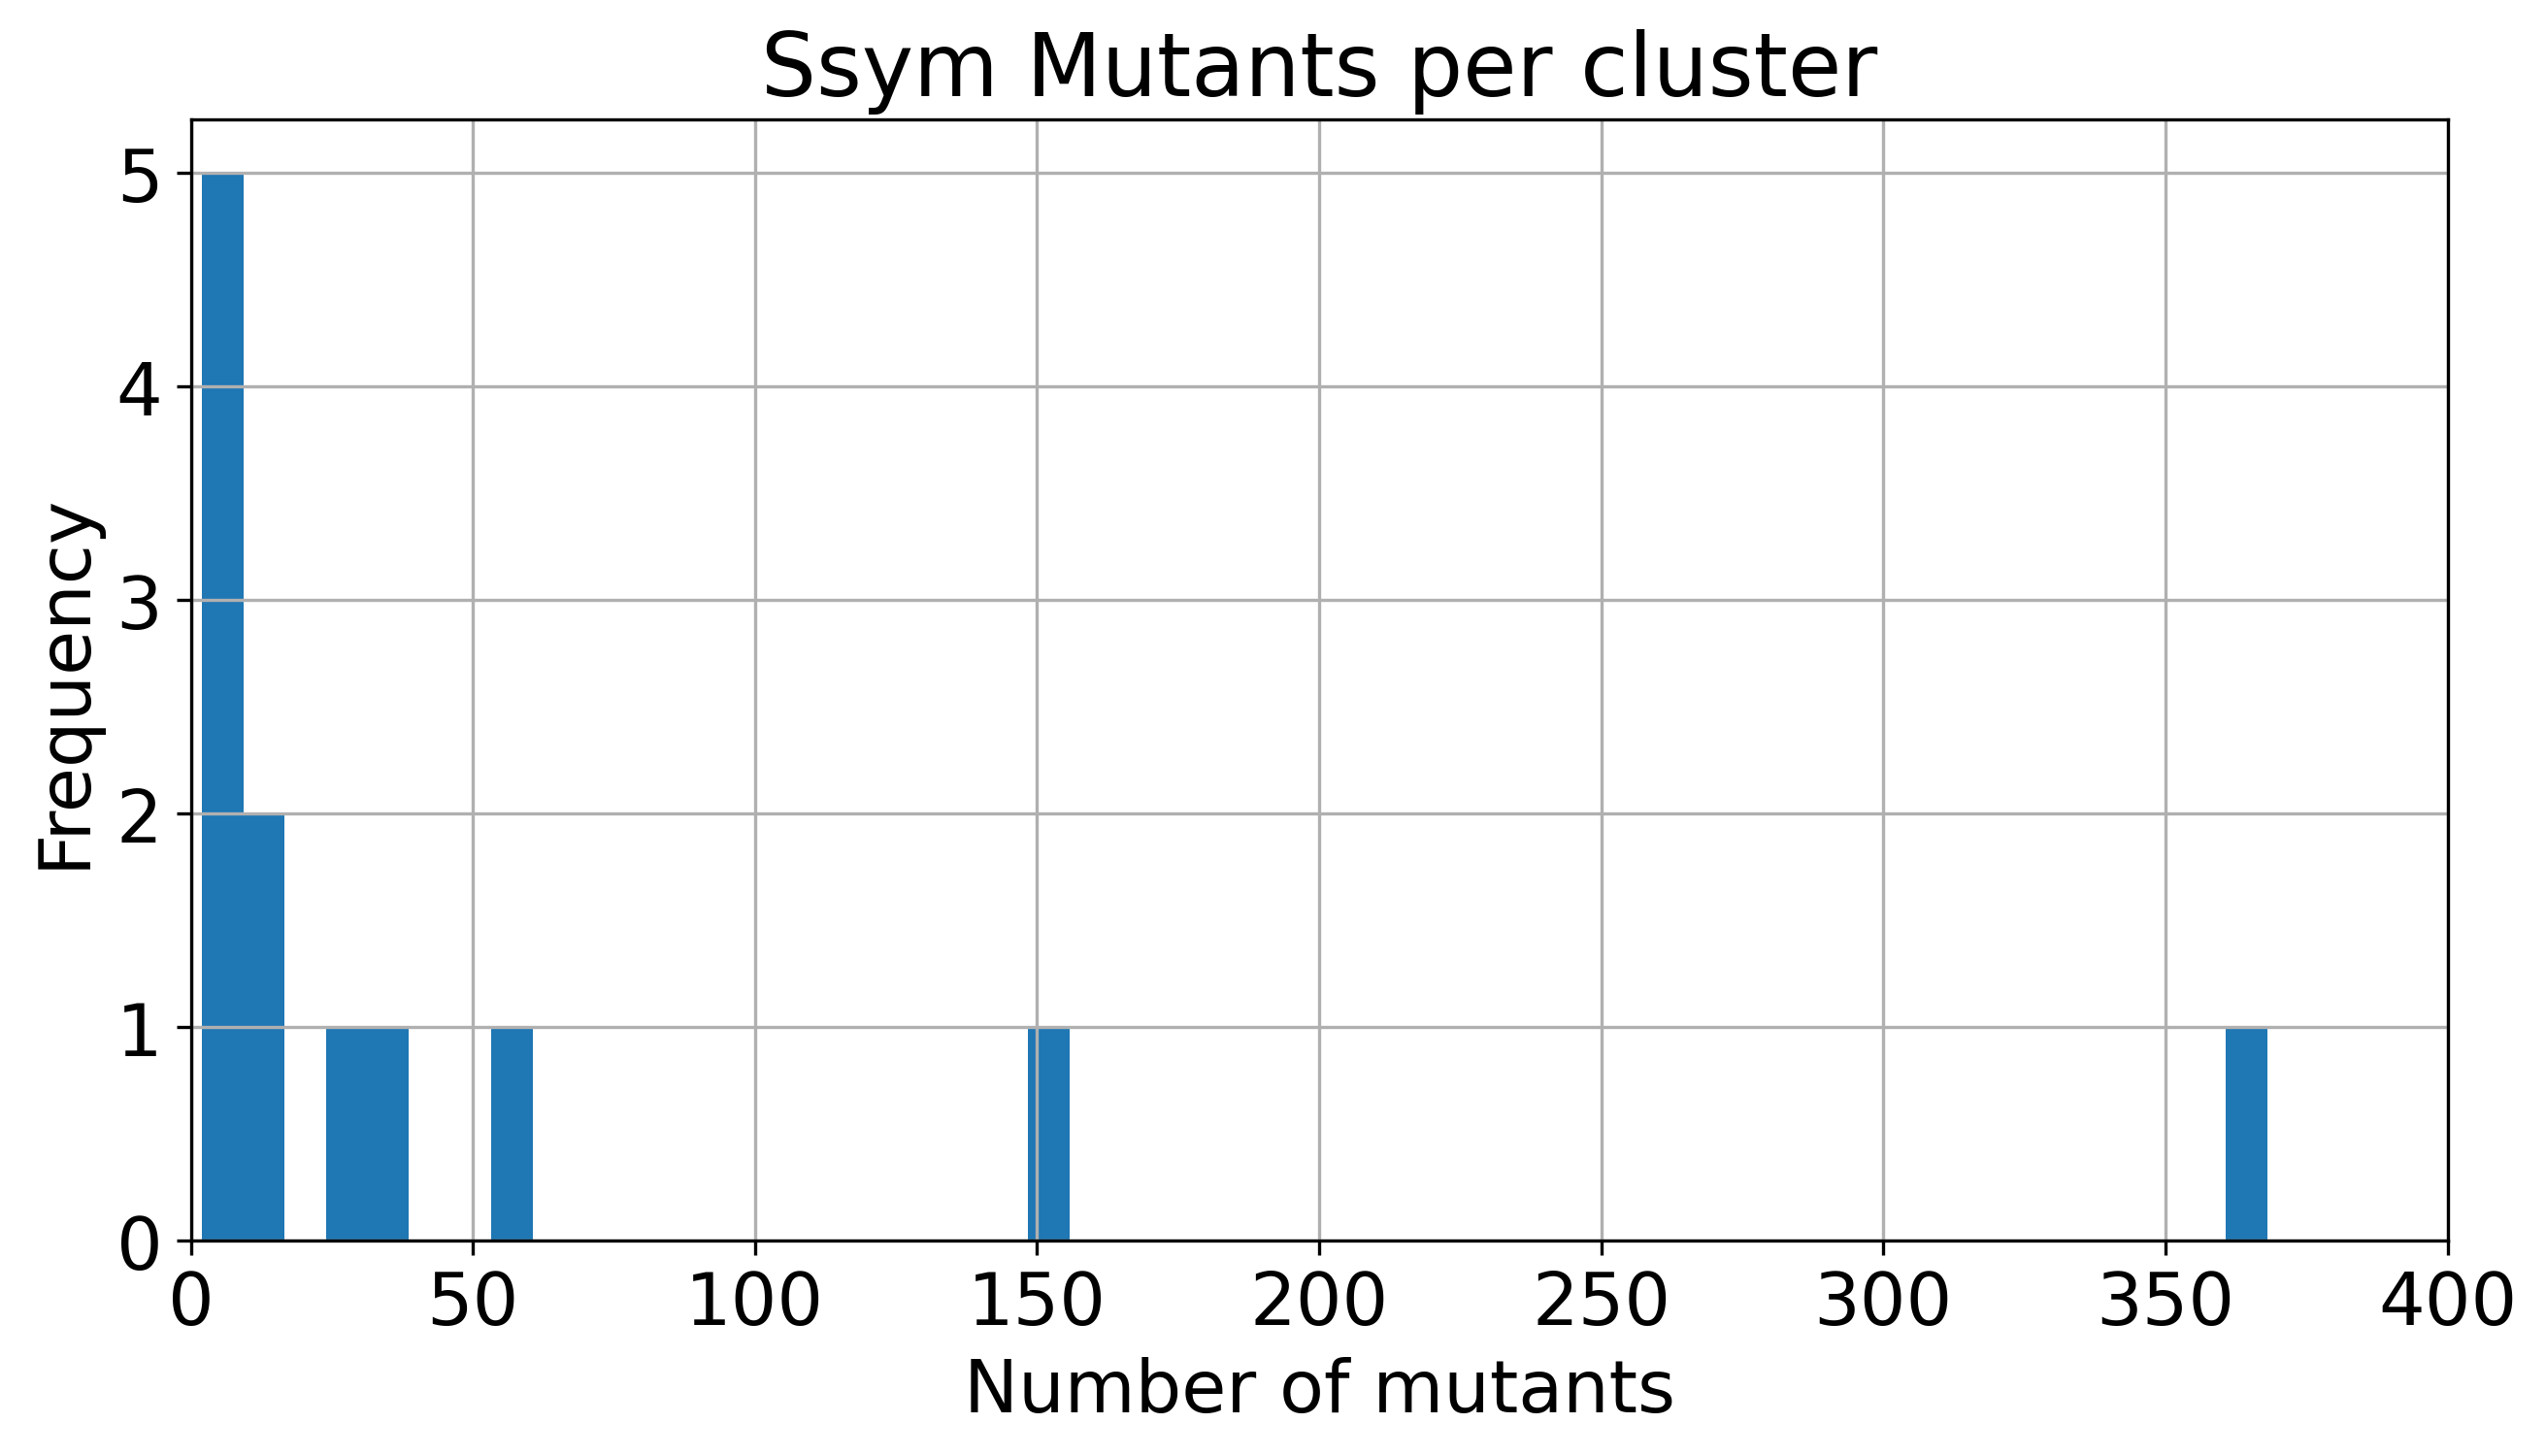

In [2]:
db_class = db

print('Original unique mutations:', len(db_class))

evolutionary = ['tranception', 'msa_transformer', 'esm1v', 'msa', 'esm2', 'ankh']
structural = ['mpnn', 'mif', 'mifst', 'esmif', 'mutcomputex', 'saprot']
supervised = ['MAESTRO', 'ThermoNet', 'INPS', 'PremPS', 'mCSM', 'DUET', 'ACDC', 'I-Mutant3.0', 'SAAFEC', 'MUpro', 'q3421']
untrained = ['DDGun']
potential = ['KORPM', 'PopMusic', 'SDM']
biophysical = ['cartesian_ddg', 'FoldX', 'Evo', 'Cartddg']
transfer = ['stability-oracle']
other = ['Dynamut2']

original_pred_cols = db_class.columns[db_class.columns.str.contains('|'.join(evolutionary + structural + supervised + untrained + potential + biophysical + transfer + other))]
original_pred_cols = list(original_pred_cols.drop(['reduced_msa_file', 'full_msa_file', 'tranception_dms', 'msa_weights']))
original_pred_cols = [c for c in original_pred_cols if not 'runtime' in c]
original_pred_cols = [c for c in original_pred_cols if not 'cluster' in c]
original_pred_cols = [c for c in original_pred_cols if not 'overlaps' in c]
original_pred_cols = [c for c in original_pred_cols if not 'pll' in c]

ensemble_cols = [c for c in db_class.columns if 'pslm' in c]
print(ensemble_cols)

db_stacked_runtimes = db[[c for c in db.columns if 'runtime' in c]]

original_pred_cols_reduced = deepcopy(original_pred_cols)
for col in [f'esm1v_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)
for col in [f'msa_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)

print(original_pred_cols_reduced)

db_class = db_class[original_pred_cols_reduced + ensemble_cols + ['ddG', 'cluster']]
db_class['cluster'] = db_class['cluster'].astype(int)

db_class_rescaled = db_class.copy(deep=True)
db_class_rescaled[original_pred_cols_reduced] /= db_class_rescaled[original_pred_cols_reduced].std()

db_class['mpnn_rosetta'] = db_class['cartesian_ddg'] + db_class['mpnn_20_00']
db_class['random'] = np.random.normal(loc=db['ddG'].mean(), size=len(db_class))
db_class['korpm'] = db_class['KORPM']
db_class['upper_bound'] = db_class['ddG'] + np.random.normal(loc=0, size=len(db_class))

fig, axes = plt.subplots(1, figsize=(10, 5), dpi=300) 
db_class.groupby('cluster').count().iloc[:, 0].hist(bins=50, ax=axes)

plt.xlim([0,400])
plt.title('Ssym Mutants per cluster')
plt.xlabel('Number of mutants')
plt.ylabel('Frequency')

group_counts = db_class.groupby('cluster').count().iloc[:, 0]
print(group_counts)
large_groups = group_counts > 0
filtered_df = db_class[db_class['cluster'].isin(large_groups[large_groups].index)]
db_class = filtered_df

print(f'Detected {len(db_class.loc[db["on_interface"].astype(bool)])} interface mutations')

print('Unique mutations in chosen set:', len(db_class))
print('Unique clusters (protein families with significant structural homology):', len(db_class['cluster'].unique()))

db_class

In [3]:
# compute statistics on the results for use by later methods
class_result = analysis_utils.compute_stats_bidirectional(db_class, stats=(), grouper='cluster', stacked=True)
class_result.to_csv('../data/extended/ssym_extended.csv')

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

### Main Figure 1b

In [4]:
db_class_ = db_class.copy(deep=True)
new_index = db_class_.reset_index()
new_index = new_index['uid'] + '_' + new_index['direction']
db_class_.index = new_index
db_class_.columns = [c+'_dir' for c in db_class_.columns]
db_class_ = db_class_.rename({'cluster_dir': 'cluster'}, axis=1)
db_class_['ddG'] = db_class_['ddG_dir']
db_class_['code'] = db_class_.index.str[:4]
db_class_
summ = analysis_utils.compute_stats(db_class_.drop('code', axis=1), 
                                    stats=('n', 'accuracy', 'MCC', 'pred_positives', 'tp', 'auprc', 'spearman', 'ndcg', 'mean_t1s', 'mean_stabilization', 'net_stabilization', 'sensitivity', 'recall@k0.0', 'recall@k1.0', 'mean_reciprocal_rank', 'fractional_gain', 'PPV'), 
                                    measurements=['ddG'], grouper='cluster', n_classes=2, n_bootstraps=100, quiet=True)
tmp1 = summ.reset_index()
tmp1.to_csv('../data/extended/ssym_extended_bootstrapped.csv')

In [5]:
import importlib
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/sareeves/PSLMs_working/analysis_notebooks/analysis_utils.py'>

upper_bound
mpnn_rosetta
KORPM
stability-oracle
cartesian_ddg
mpnn_20_00
DDGun3D
INPS3D
esm2_650M
random


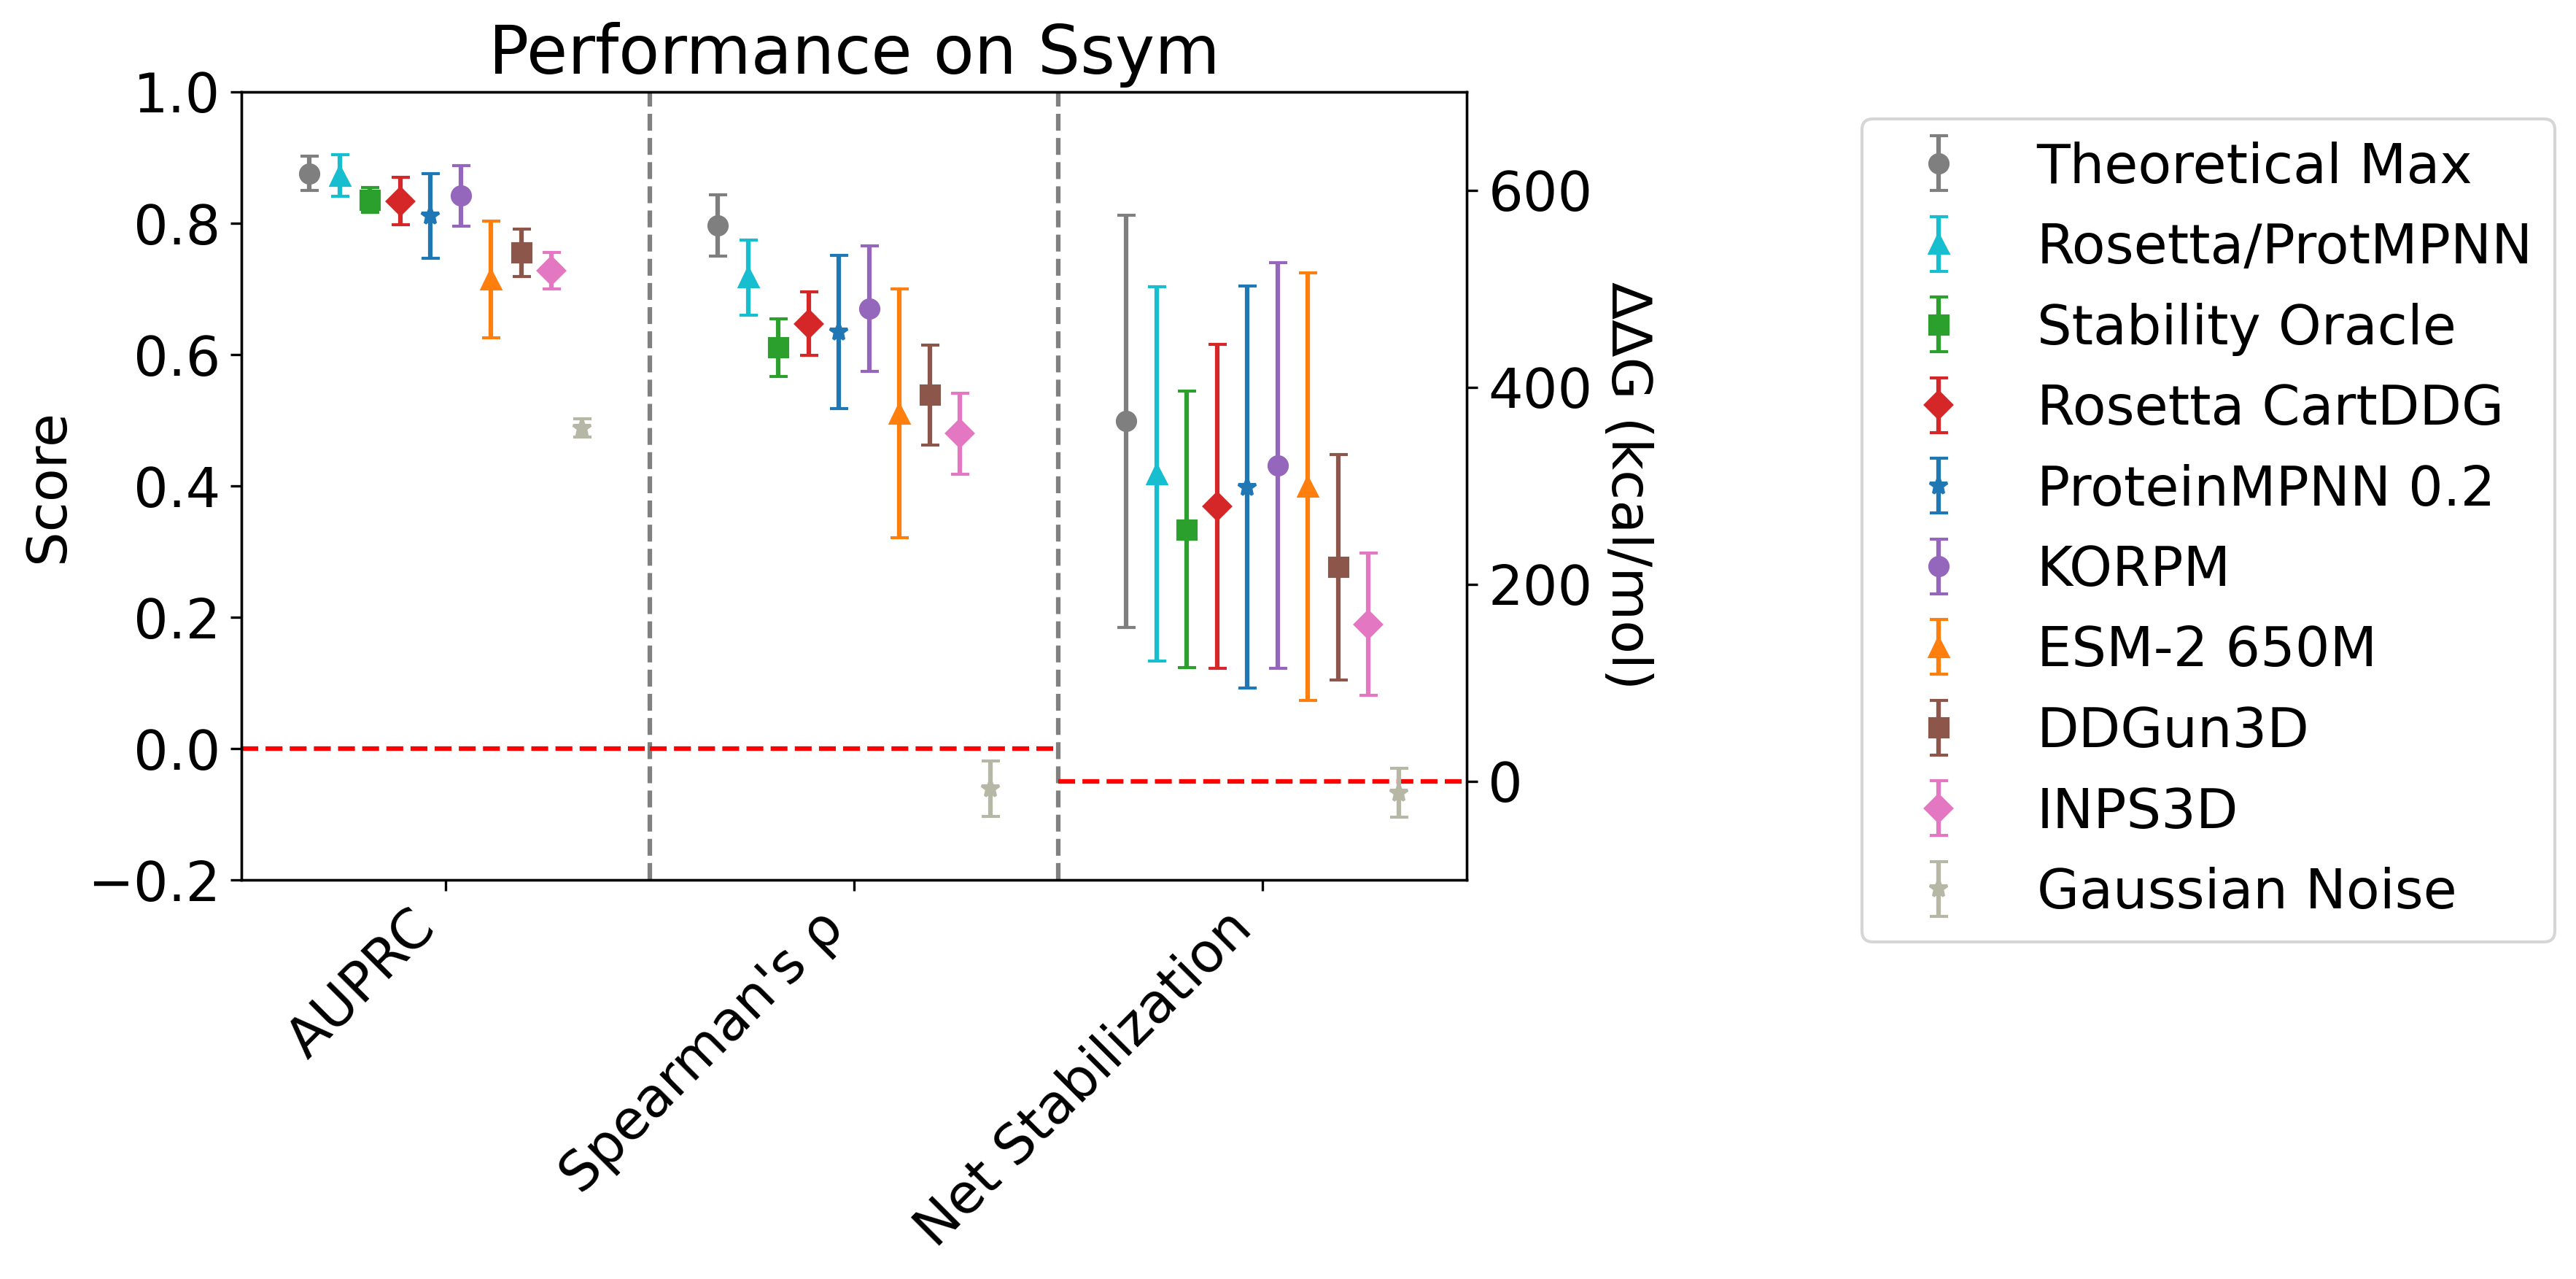

In [6]:
s2 = tmp1.sort_values('auprc_mean', ascending=False).dropna(how='all', axis=1).reset_index()
s3 = s2.loc[s2['model'].isin([c+'_dir' for c in original_pred_cols_reduced] + [
            'random_dir', 
            'ddG_dir', 
            'upper_bound_dir',
            'K1566_pslm_rfa_2_dir', 
            'K1566_pslm_rfa_3_dir', 
            'K1566_pslm_rfa_4_dir',
            'K1566_pslm_rfa_5_dir',
            'K1566_pslm_rfa_6_dir',
            'K1566_pslm_rfa_7_dir',
            'mpnn_rosetta_dir'])
            ].drop('measurement', axis=1)
plot_cols = ['auprc', 'spearman','net_stabilization']
plot_models = ['upper_bound', 'mpnn_rosetta', 'stability-oracle', 'cartesian_ddg', 'mpnn_20_00', 'KORPM', 'esm2_650M', 'DDGun3D', 'INPS3D', 'random']
plot_title = 'Ssym'
y_lim = (-0.2, 1)
right_y_lim = (-100, 700)
table_cols = ['auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0']
tab, fig = analysis_utils.bootstrap_table(s3, 
                plot_cols,
                plot_models, 
                plot_title,
                y_lim,
                right_y_lim,
                table_cols, 
                var_cols=['net_stabilization'], 
                sort_col='auprc',
                saveloc_formatted='../data/extended/ssym_bootstrapped_formatted.csv',
                saveloc_full='../data/extended/figure_data/fig1c.csv')

fig.savefig(os.path.join(path, 'data', 'extended', 'figure_data', 'fig1c.svg'), bbox_inches='tight')

### Extended Data Table

In [7]:
table1 = class_result #.loc[:,['n', 'MCC', 'auprc', 'spearman', 'weighted_ndcg', 'weighted_auprc', 'weighted_spearman']]
table = table1.sort_values(['direction', 'weighted_spearman'], ascending=False).reset_index()

for source, target in remap_names.items():
    table.loc[table['model']==source, 'model'] = target
#table['model'] = table['model'].map(remap_names)
table.loc[table['model'].isin(['Gaussian noise', 'ΔΔG label']), 'model_type'] = 'control'

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 'recall@k1.0': 'Recall @ k',
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'antisymmetry': 'Antisymmetry', 'bias': 'Bias',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'pearson': 'Pearson', 'PPV': 'PPV', 'mean_reciprocal_rank': 'MRR'}
table = table.rename(remap_cols, axis=1)
#table = table[['direction', 'model_type', 'model', 'n', 'MCC', 'AUPRC', 'ρ', 'wNDCG', 'wAUPRC', 'wρ', 'mean_t1s', 'Net Stabilization',
#    'mean_stabilization', 'mean PPC', 'mean MSC', 'True Positives', 'Sensitivity', 'Accuracy', 'Pearson']]
table = table.rename({'direction': 'Direction', 'model_type': 'Model Type', 'model': 'Model'}, axis=1)

#'auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0'
#table = table[['Direction', 'Model Type', 'Model', 'n', 'Spearman\'s ρ', 'Sensitivity', 'PPV', 'Antisymmetry', 'Bias']]
table = table[['Direction', 'Model Type', 'Model', 'AUPRC', 'Spearman\'s ρ', 'Net Stabilization', 'MCC', 'Sensitivity', 'Recall @ k', 'Antisymmetry', 'Bias']]

table = table.loc[~table['Model'].str.contains('K1566')]
table = table.dropna(subset='Model').set_index(['Direction', 'Model Type', 'Model']).astype(float).round(3).drop_duplicates()

t = table.xs('combined').sort_values('AUPRC', ascending=False).applymap(analysis_utils.format_fixed_total_digits)
t.to_csv('../data/extended/ssym_formatted_extended.csv', encoding='utf-8-sig')
t

AUPRC Spearman's ρ Net Stabilization    MCC  \
Model Type  Model                                                               
control     ΔΔG label              1.00         1.00               453   1.00   
supervised  PremPS                 0.91         0.84               385   0.65   
ensemble    Rosetta/ProtMPNN       0.89         0.74               324   0.58   
unknown     Theoretical Max        0.88         0.81               381   0.55   
potential   KORPM                  0.86         0.71               333   0.56   
biophysical Rosetta CartDDG        0.85         0.67               288   0.50   
struc. PSLM ProteinMPNN 0.3        0.84         0.69               328   0.55   
ensemble    Ensemble 4 Feats       0.84         0.69               319   0.52   
transfer    Stability Oracle       0.84         0.62               263   0.49   
struc. PSLM ProteinMPNN 0.2        0.83         0.69               310   0.53   
ensemble    Ensemble 5 Feats       0.83         0.68               327   0.53   
            Ensemble 6 Feats       0.82         0.69               332   0.54   
            Ensemble 8 Feats       0.82         0.69               334   0.55   
            Ensemble 7 Feats       0.82         0.68               330   0.53   
struc. PSLM ProteinMPNN 0.1        0.82         0.65               286   0.50   
NaN         Cartddg                0.82         0.63               265   0.48   
transfer    ACDC-NN                0.81         0.62               265   0.40   
ensemble    Ensemble 3 Feats       0.80         0.63               301   0.48   
struc. PSLM MutComputeX            0.80         0.47               192   0.42   
            MIF                    0.79         0.59               271   0.43   
transfer    ACDC-NN-Seq            0.79         0.57               209   0.33   
ensemble    Ensemble 2 Feats       0.78         0.63               313   0.47   
supervised  INPS-Seq               0.77         0.54               229   0.30   
seq. PSLM   ESM-2 15B              0.77         0.60               326   0.47   
untrained   DDGun3D                0.77         0.55               227   0.36   
biophysical EvoEF                  0.76         0.48               200   0.31   
struc. PSLM MIF-ST                 0.76         0.60               301   0.46   
untrained   DDGun                  0.76         0.54               233   0.34   
biophysical FoldX                  0.75         0.51               236   0.37   
seq. PSLM   ESM-2 3B               0.75         0.57               328   0.47   
            MSA-T median           0.75         0.59               333   0.47   
            MSA-T mean             0.74         0.59               331   0.44   
            ESM-2 650M             0.74         0.58               310   0.46   
supervised  I-Mutant3.0-Seq        0.74         0.41              97.0   0.29   
struc. PSLM ESM-IF                 0.73         0.55               258   0.39   
seq. PSLM   Tranception            0.73         0.57               326   0.47   
supervised  INPS3D                 0.73         0.46               163   0.30   
seq. PSLM   Tranception (reduced)  0.73         0.57               326   0.47   
            Ankh                   0.73         0.58               331   0.45   
supervised  DUET                   0.70         0.38               126   0.27   
            MAESTRO                0.70         0.40               106   0.23   
            ThermoNet              0.70         0.41               157   0.24   
            I-Mutant3.0            0.69         0.36              62.4   0.23   
potential   SDM                    0.68         0.30               113   0.26   
seq. PSLM   ESM-2 150M             0.67         0.45               245   0.34   
supervised  MUpro                  0.67         0.36              62.6   0.26   
seq. PSLM   ESM-1V mean            0.67         0.45               246   0.33   
            ESM-1V median          0.66         0.45             

In [8]:
zs_feats = ['delta_kdh', 'delta_vol', 'rel_ASA']
#red_cols = [c[:-4] for c in original_pred_cols_reduced]

#models = original_pred_cols_reduced + [c + '_dir' for c in zs_feats]
#models += [c.replace('_dir', '_inv') for c in models]
#print(models)
models = list(db_class.columns)

db_ens = db_class.copy(deep=True)
db_ens = db_ens[models]

print(len(db_ens))
db_ens['random'] = np.random.rand(len(db_ens)) - 0.5
#db_ens['random_inv'] = np.random.rand(len(db_ens)) - 0.5
#db_ens = db_ens.drop(['KORPMD_dir', 'CartddgD_dir', 'FoldXD_dir', 'EvoD_dir', 'Dyna2D_dir', 'PopMsD_dir', 'DDGunD_dir', 'TNetD_dir', 'ACDCNND_dir'], axis=1)
dfm = db_ens.copy(deep=True)

def unstack_frames(df):
    df_dir = df.xs('dir')
    df_dir.columns = [c + '_dir' for c in df_dir.columns]
    df_inv = df.xs('inv')
    df_inv.columns = [c + '_inv' for c in df_inv.columns]
    return df_dir.join(df_inv)
dfu = unstack_frames(dfm)

weights = [1, 0.5, 0.2]
#weights2 = [0.8, 0.3]

all_cols = []

tmp = []
for model1 in models:
    for model2 in models:
        if model1 != model2: #(model1.split('_')[0] != model2.split('_')[0]) and (model1[:4] != model2[:4]) and
            for weight in weights:
                tmp.append(pd.Series(dfm[model1]/dfm[model1].std() + dfm[model2]/dfm[model2].std() * weight, name=f'{model1} + {model2} * {weight}'))
                all_cols.append(f'{model1} + {model2} * {weight}')
                #for model3 in models:
                #    if model2 != model3 and model1 != model3:
                #        for weight2 in weights2:
                #            tmp.append(pd.Series(dfm[model1] + dfm[model2] * weight + dfm[model3] * weight2, name=f'{model1} + {model2} * {weight} + {model3} * {weight2}'))
                #            all_cols.append(f'{model1} + {model2} * {weight} + {model3} * {weight2}')

dfm = pd.concat([dfm] + tmp, axis=1)
#dfm = dfm.join(db_stacked_runtimes)
dfm
#dfm.to_csv(os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_preds.csv'))
#dfm

684


ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET  Dynamut2   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F -0.992     -1.34 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735     -2.07 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717     -2.18 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375     -1.60  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495     -1.75  0.24 -6.466620         0.09   
...                              ...       ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774     -0.55  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580     -3.05 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450     -0.56  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734     -3.22 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081     -0.88  2.10  3.440730        -0.77   

                               ...  upper_bound + cluster * 0.2  \
direction uid       uid2       ...                                
dir       1AMQ_191F 1AMQ_180F  ...                    -1.185425   
inv       1AMQ_191F 1AMQ_180F  ...                     0.622646   
dir       1AMQ_191S 1AMQ_180S  ...                    -1.475800   
inv       1AMQ_191S 1AMQ_180S  ...                     0.404433   
dir       1AMQ_191W 1AMQ_180W  ...                    -1.282895   
...                            ...                          ...   
inv       5PTI_35G  5PTI_35G   ...                     3.615570   
dir       5PTI_43G  5PTI_43G   ...                    -2.045844   
inv       5PTI_43G  5PTI_43G   ...                     4.082760   
dir       5PTI_45A  5PTI_45A   ...                    -2.036391   
inv       5PTI_45A  5PTI_45A   ...                     5.232904   

                               upper_bound + mpnn_rosetta * 1  \
direction uid       uid2                                        
dir       1AMQ_191F 1AMQ_180F                       -2.557749   
inv       1AMQ_191F 1AMQ_180F                        0.327626   
dir       1AMQ_191S 1AMQ_180S                       -2.232353   
inv       1AMQ_191S 1AMQ_180S                        0.609170   
dir       1AMQ_191W 1AMQ_180W                       -4.098935   
...                                                       ...   
inv       5PTI_35G  5PTI_35G                         1.818445   
dir       5PTI_43G  5PTI_43G                        -5.857601   
inv       5PTI_43G  5PTI_43G                         4.815654   
dir       5PTI_45A  5PTI_45A                        -5.677342   
inv       5PTI_45A  5PTI_45A                         6.297284   

                               upper_bound + mpnn_rosetta * 0.5  \
direction uid       uid2                                          
dir       1AMQ_191F 1AMQ_180F                         -1.921922   
inv       1AMQ_191F 1AMQ_180F  

In [9]:
def get_summary_df(db_complete, cols=None, saveloc=os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_results.csv'), stats=(), stacked=False):

    assert os.path.exists(os.path.dirname(saveloc))
    #assert not os.path.exists(saveloc)
    #if cols is None:
    #    cols = db_complete.columns.drop(['code'])#, 'ddG_dir', 'ddG_inv'])

    if not stacked:
        db_stacked = analysis_utils.stack_frames(db_complete)
    else:
        db_stacked = db_complete
    #db_stacked['code'] = list(db_stacked.reset_index()['uid'].str[:4])
    #print(db_stacked)

    df_summ = analysis_utils.compute_stats_bidirectional(db_stacked, stacked=True, stats=(), grouper='cluster', directions=['dir', 'inv']).reset_index().set_index(['direction', 'model'])#.join(df_reg) #.drop('n_total', axis=1))
    df_summ = df_summ.reset_index().rename({'index': 'model'}, axis=1).set_index(['direction', 'model_type', 'model', 'class'])
    df_summ = df_summ.sort_index(level=1).sort_index(level=0)#.drop_duplicates()
    df_summ.to_csv(saveloc)
    return df_summ

In [10]:
# takes a long time to compute and has already been done
d1 = get_summary_df(dfm, saveloc=os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv'), stats=(), stacked=True) 
d1 = pd.read_csv(os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv')).set_index(['direction', 'model_type', 'model', 'class'])
d1 = d1.reset_index().replace({'Dynamut2': 'Dynamut'}, regex=True).set_index(['direction', 'model_type', 'model', 'class'])
d1

  0%|          | 0/10324 [00:00<?, ?it/s]

  0%|          | 0/10324 [00:00<?, ?it/s]

n     tp     fp  \
direction model_type  model                       class                        
combined  NaN         Cartddg                     NaN    684.0  198.0   42.0   
          biophysical Evo                         NaN    684.0  209.0  102.0   
                      FoldX                       NaN    684.0  206.0   80.0   
                      cartesian_ddg               NaN    684.0  210.0   44.0   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2 NaN    684.0  240.0  102.0   
...                                                        ...    ...    ...   
inv       unknown     ddG                         NaN    342.0  253.0    0.0   
                      random                      NaN    342.0  135.0   48.0   
                      upper_bound                 NaN    342.0  203.0   40.0   
          untrained   DDGun                       NaN    342.0  187.0   49.0   
                      DDGun3D                     NaN    342.0  181.0   37.0   

                                                            tn     fn  \
direction model_type  model                       class                 
combined  NaN         Cartddg                     NaN    300.0  144.0   
          biophysical Evo                         NaN    240.0  133.0   
                      FoldX                       NaN    262.0  136.0   
                      cartesian_ddg               NaN    298.0  132.0   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2 NaN    240.0  102.0   
...                                                        ...    ...   
inv       unknown     ddG                         NaN     89.0    0.0   
                      random                      NaN     41.0  118.0   
                      upper_bound                 NaN     49.0   50.0   
          untrained   DDGun                       NaN     40.0   66.0   
                      DDGun3D                     NaN     52.0   72.0   

                                                         sensitivity  \
direction model_type  model                       class                
combined  NaN         Cartddg                     NaN       0.578947   
          biophysical Evo                         NaN       0.611111   
                      FoldX                       NaN       0.602339   
                      cartesian_ddg               NaN       0.614035   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2 NaN       0.701754   
...                                                              ...   
inv       unknown     ddG                         NaN       1.000000   
                      random                      NaN       0.533597   
                      upper_bound                 NaN       0.802372   
          untrained   DDGun                       NaN       0.739130   
                      DDGun3D                     NaN       0.715415   

                                                         specificity  \
direction model_type  model                       class                
combined  NaN         Cartddg                     NaN       0.877193   
          biophysical Evo                         NaN       0.701754   
                      FoldX                       NaN       0.766082   
                      cartesian_ddg               NaN       0.871345   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2 NaN       0.701754   
...                                                              ...   
inv       unknown     ddG                         NaN       1.000000   
                      random                      NaN       0.460674   
                      upper_bound                 NaN       0.550562   
          untrained   DDGun                       NaN       0.449438   
                      DDGun3D                     NaN       0.584270   

                                                              PPV  \
direction model_type  model                       class             
combined  NaN         Cartddg                     NaN    0

In [11]:
dfu_ = dfu.join(db_stacked_runtimes)
dfu_ = dfu_.rename({'Dynamut2_dir': 'Dynamut_dir'}, axis=1)
dfu_

ACDC-NN_dir  ACDC-NN-Seq_dir  Cartddg_dir  \
uid       uid2      direction                                              
1AMQ_191F 1AMQ_180F dir           0.155387         0.000000        -8.00   
                    inv           0.155387         0.000000        -8.00   
1AMQ_191S 1AMQ_180S dir          -0.310174         0.000000        -4.22   
                    inv          -0.310174         0.000000        -4.22   
1AMQ_191W 1AMQ_180W dir           0.175478         0.000235        -8.00   
...                                    ...              ...          ...   
5PTI_35G  5PTI_35G  inv          -3.815977        -3.124952        -8.00   
5PTI_43G  5PTI_43G  dir          -1.785572        -1.548846        -8.00   
                    inv          -1.785572        -1.548846        -8.00   
5PTI_45A  5PTI_45A  dir          -3.439780        -3.219905        -8.00   
                    inv          -3.439780        -3.219905        -8.00   

                               DDGun_dir  DDGun3D_dir  DUET_dir  Dynamut_dir  \
uid       uid2      direction                                                  
1AMQ_191F 1AMQ_180F dir              0.9          0.9    -0.992        -1.34   
                    inv              0.9          0.9    -0.992        -1.34   
1AMQ_191S 1AMQ_180S dir              0.2         -0.5    -1.717        -2.18   
                    inv              0.2         -0.5    -1.717        -2.18   
1AMQ_191W 1AMQ_180W dir              1.1          1.0    -1.495        -1.75   
...                                  ...          ...       ...          ...   
5PTI_35G  5PTI_35G  inv             -4.5         -4.4    -4.156        -3.94   
5PTI_43G  5PTI_43G  dir             -2.1         -1.9    -2.580        -3.05   
                    inv             -2.1         -1.9    -2.580        -3.05   
5PTI_45A  5PTI_45A  dir             -5.3         -4.4    -3.734        -3.22   
                    inv             -5.3         -4.4    -3.734        -3.22   

                               Evo_dir  FoldX_dir  I-Mutant3.0_dir  ...  \
uid       uid2      direction                                       ...   
1AMQ_191F 1AMQ_180F dir          -0.43  -3.458090             0.03  ...   
                    inv          -0.43  -3.458090             0.03  ...   
1AMQ_191S 1AMQ_180S dir          -1.18   0.178326            -0.09  ...   
                    inv          -1.18   0.178326            -0.09  ...   
1AMQ_191W 1AMQ_180W dir           0.24  -6.466620             0.09  ...   
...                                ...        ...              ...  ...   
5PTI_35G  5PTI_35G  inv          -4.04  -3.672690            -3.03  ...   
5PTI_43G  5PTI_43G  dir          -3.00  -1.977350            -2.67  ...   
                    inv          -3.00  -1.977350            -2.67  ...   
5PTI_45A  5PTI_45A  dir          -3.35  -3.351550            -2.60  ...   
                    inv          -3.35  -3.351550            -2.60  ...   

                               runtime_msa_1  runtime_msa_2  runtime_msa_3  \
uid       uid2      direction                                                
1AMQ_191F 1AMQ_180F dir             3.422021       3.423559       3.534027   
                    inv             3.396734       3.396029       3.400826   
1AMQ_191S 1AMQ_180S dir             3.398933       3.394464       3.398379   
                    inv             3.387094       3.416658       3.419749   
1AMQ_191W 1AMQ_180W dir             3.396502       3.396971       3.398093   
...                                      ...            ...            ...   
5PTI_35G  5PTI_35G  inv             0.880128       0.880030       0.880435   
5PTI_43G  5PTI_43G  dir             0.881322       0.880291       0.880465   
                    inv             0.879922       0.879977       0.880127   
5PTI_45A  5PTI_45A  dir             0.881539       0.880005       0.881965   
                    inv             0.883585       0.882248       0.881539   

          

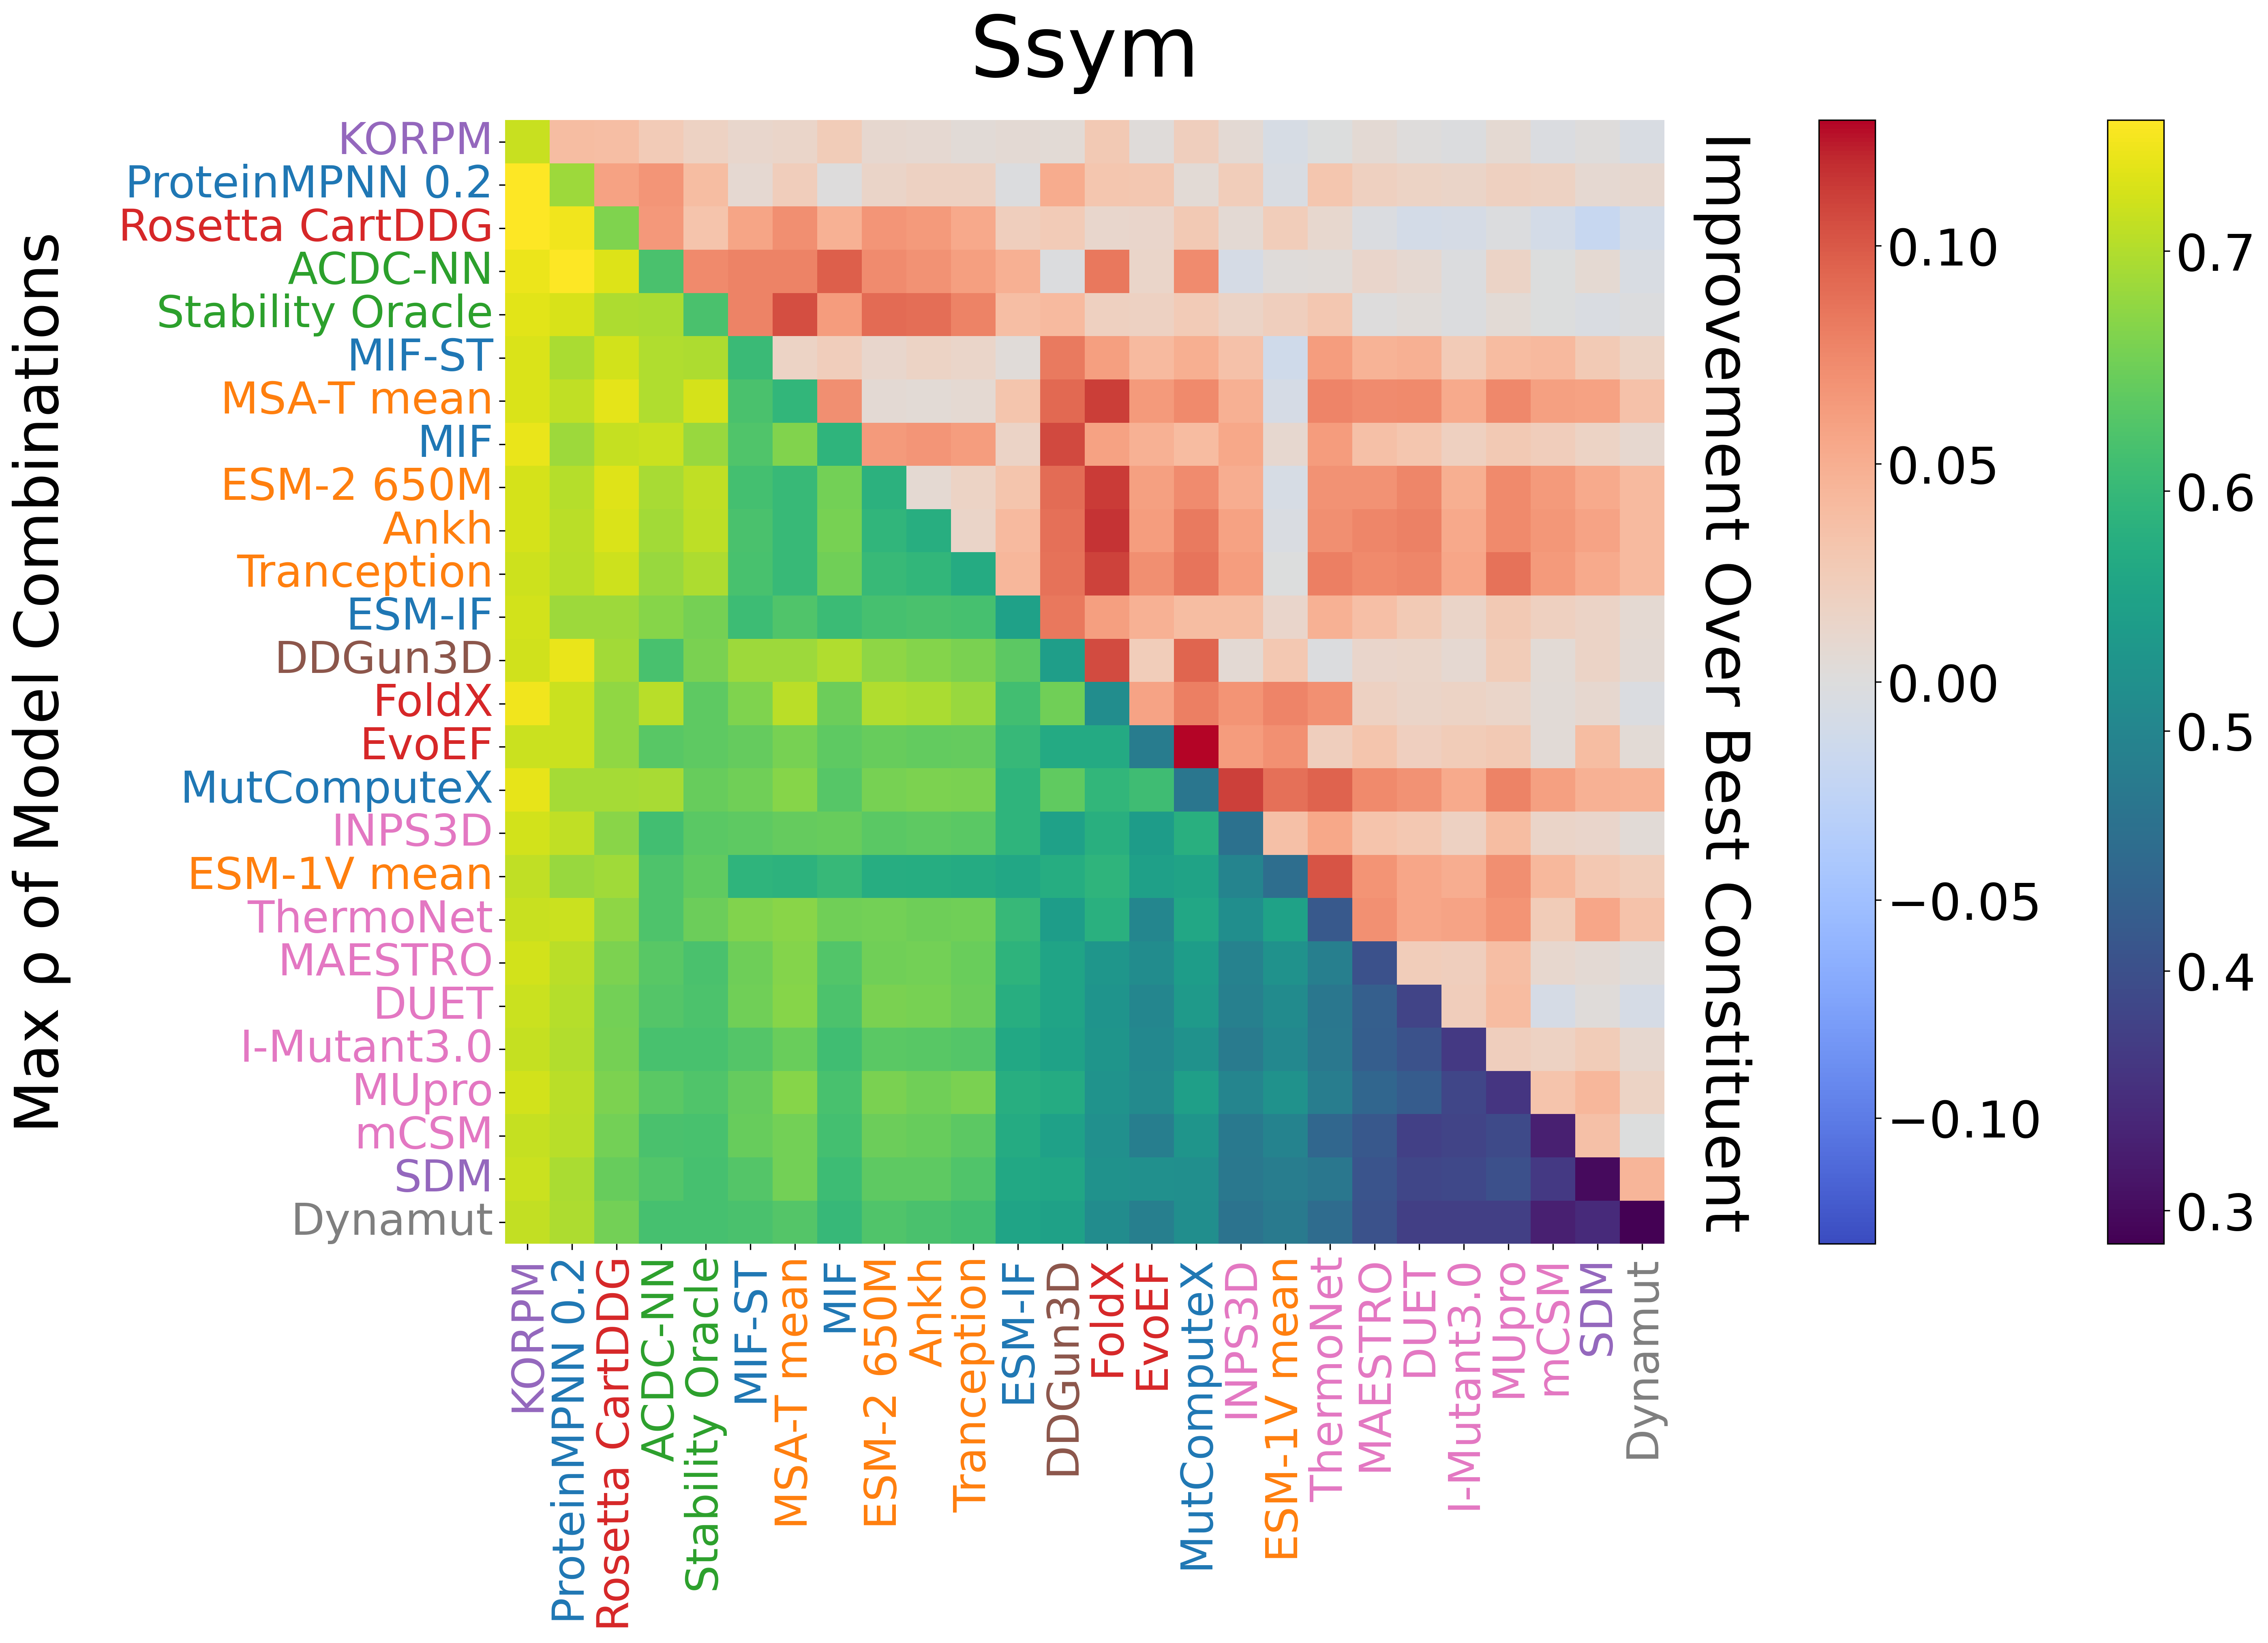

In [12]:
import importlib
importlib.reload(analysis_utils)
subset = [#'ACDC-NN-Seq', 
        'ACDC-NN', 
        #'DDGun'
        'DDGun3D',
        'DUET',
        'Dynamut',
        'FoldX',
        'Evo',
        'I-Mutant3.0',
        #'I-Mutant3.0-Seq',
        #'INPS-Seq',
        'INPS3D',
        'MAESTRO',
        'MUpro',
        'PopMusic',
        #'PremPS',
        'ThermoNet',
        'SAAFEC-Seq',
        'SDM',
        'mCSM',
        'cartesian_ddg',
        'esm1v_mean',
        'esm2_650M',
        'ankh',
        'msa_transformer_mean',
        'tranception_weights',
        'esmif_multimer',
        'KORPM',
        'mpnn_20_00',
        'mif',
        'mifst',
        'stability-oracle',
        'mutcomputex',
        'saprot'
        #'SOL_ACC',
        #'delta_kdh',
        #'delta_vol',
        #'abs_ASA',
        ]

direction = 'combined'
statistic = 'spearman'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df, fig = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym', saveloc_table=os.path.join(path, 'data', 'extended', 'figure_data', 'fig3a.csv'))
fig.savefig(os.path.join(path, 'data', 'extended', 'figure_data', 'fig3a.svg'), bbox_inches='tight')

stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
#out = stat_df.head(30)
#models = set(list(out['model1']) + list(out['model2']))
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
#stat_df_.to_csv('../data/stat_df_s461.csv')
stat_df_.head(30)
stat_df_.head(30).to_csv(os.path.join(path, 'data', 'extended', 'top_pairwise_spearman_ssym.csv'))

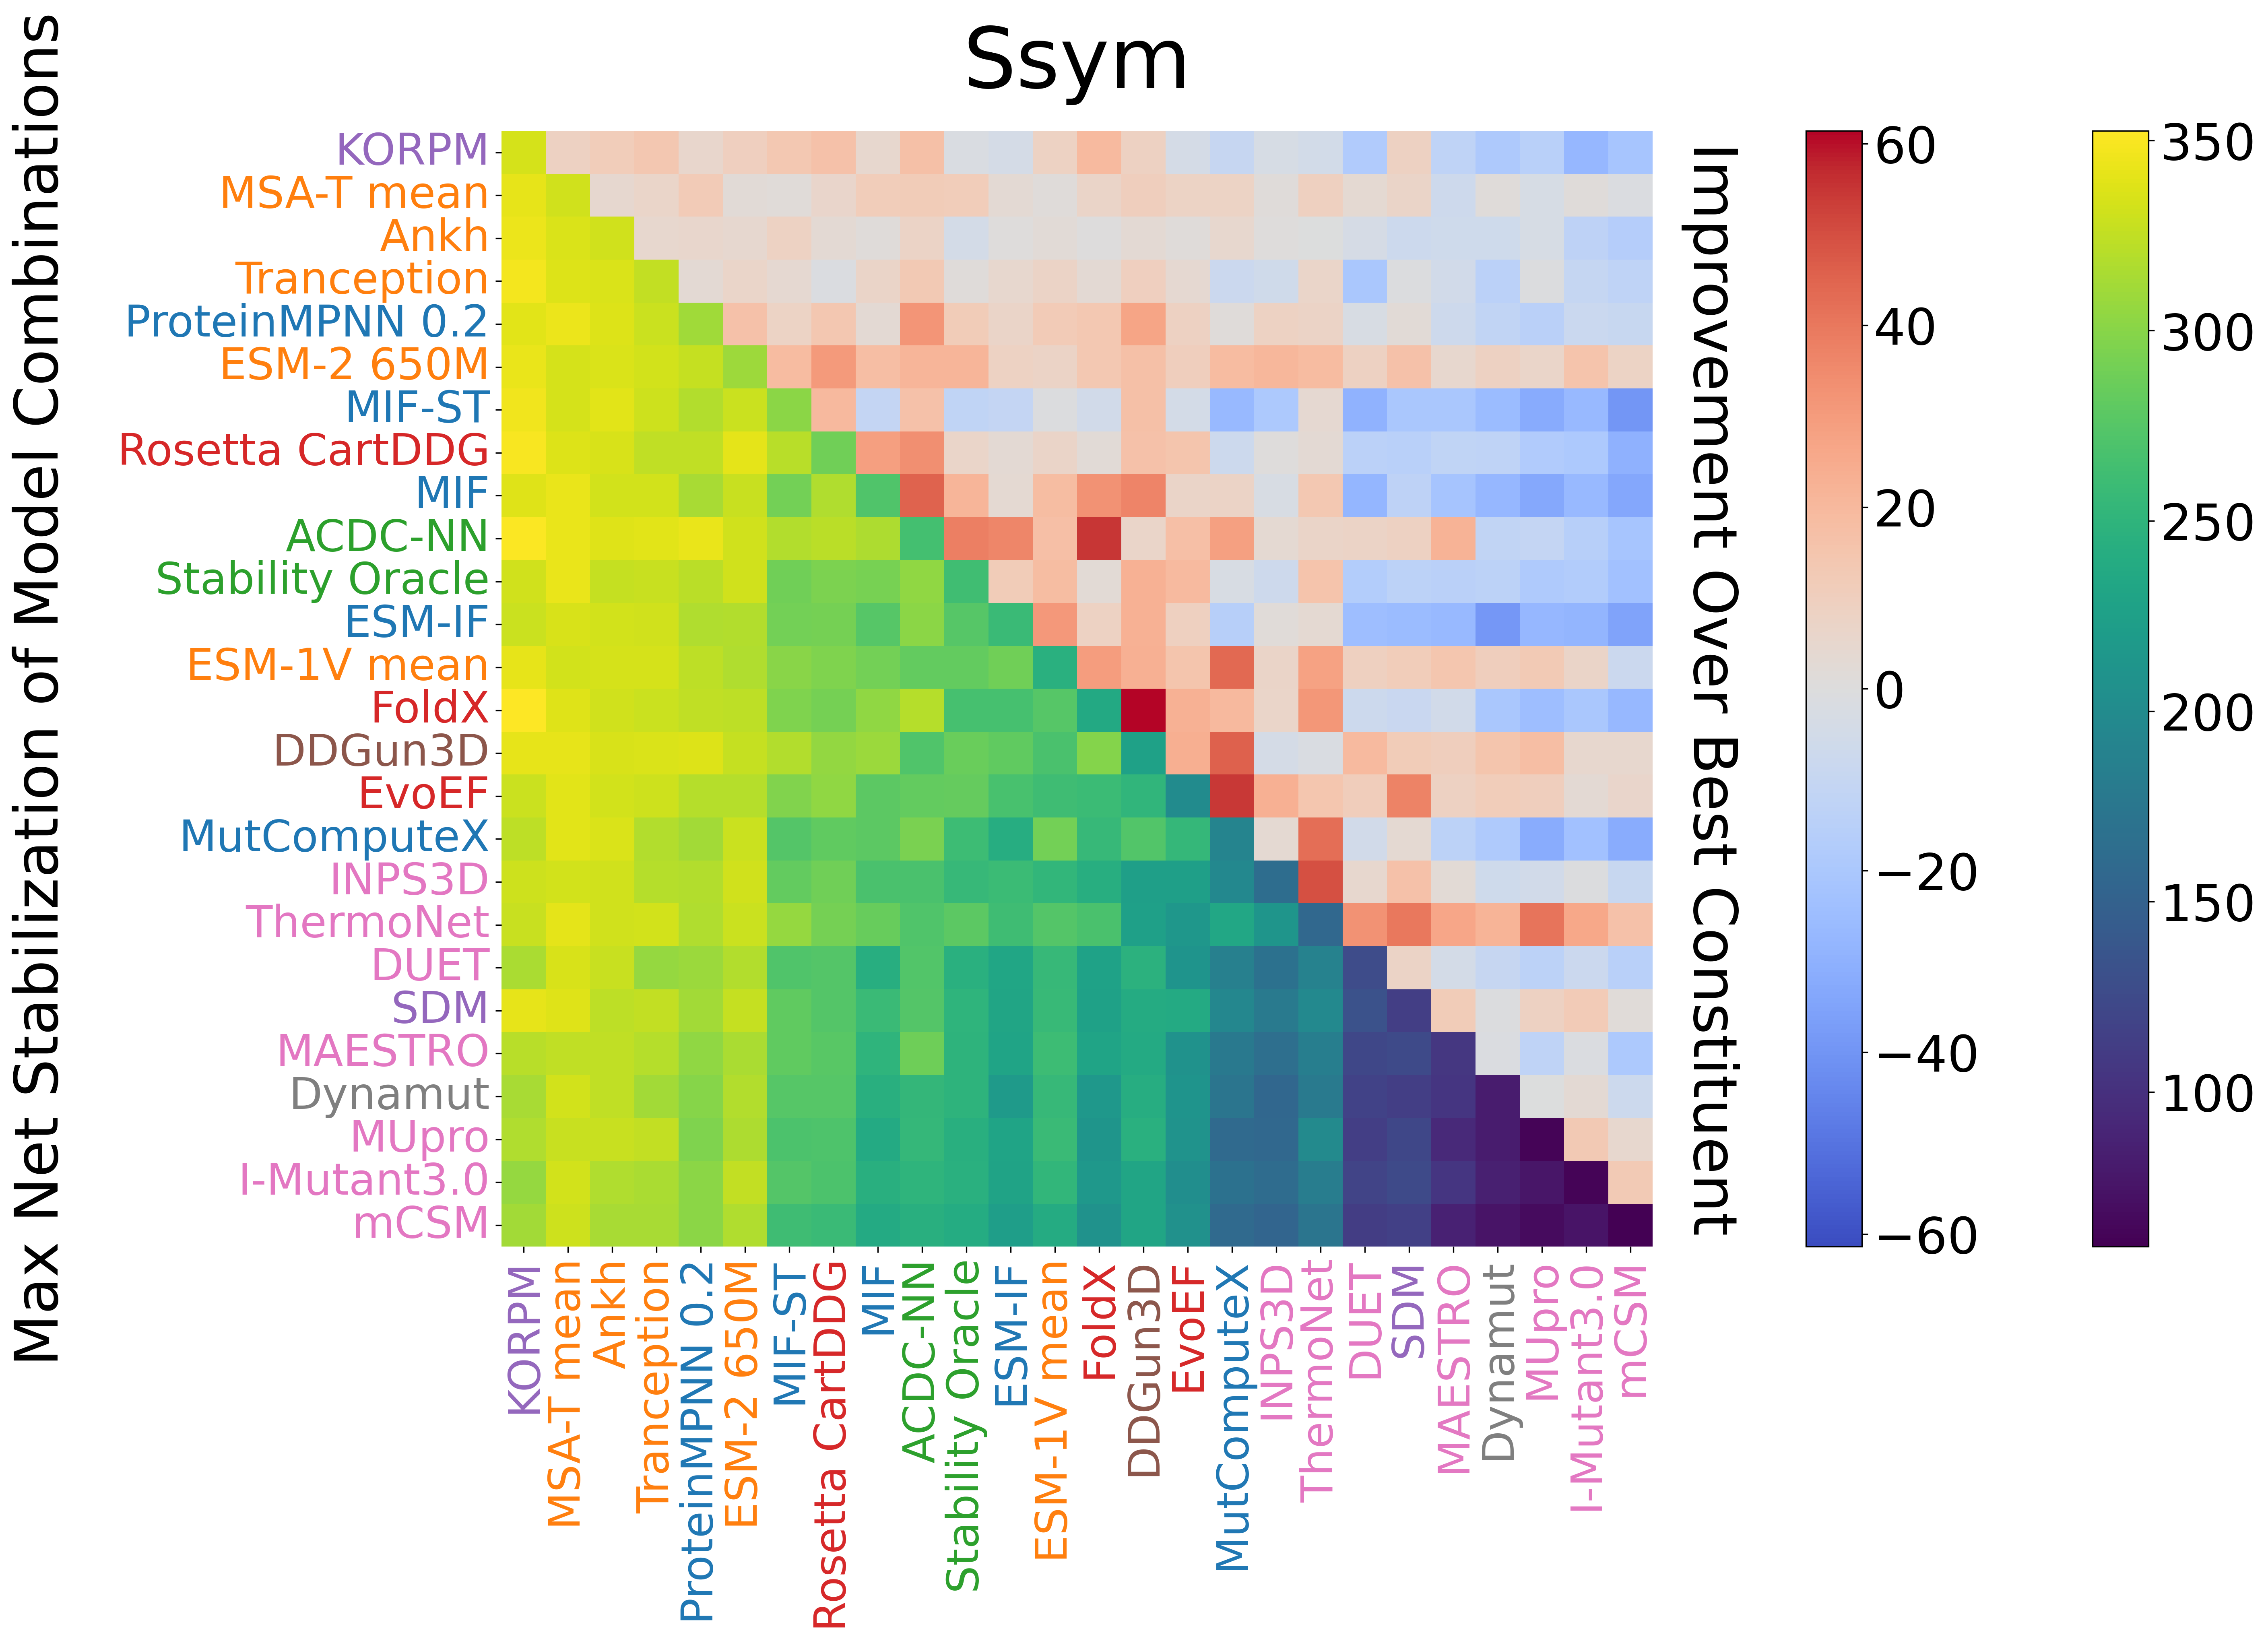

Base model       Added Model  Weight  Net Stabilization  \
Rank                                                                 
1               KORPM             FoldX     0.5             352.48   
2               KORPM           ACDC-NN     0.2             350.40   
3               KORPM   Rosetta CartDDG     0.5             349.91   
4               KORPM       Tranception     0.2             347.15   
5               KORPM            MIF-ST     0.2             346.70   
6               KORPM              Ankh     0.2             344.35   
7          MSA-T mean   ProteinMPNN 0.2     0.5             343.50   
8             ACDC-NN        MSA-T mean     1.0             343.16   
9               KORPM        ESM-2 650M     0.5             342.85   
10         MSA-T mean               MIF     0.5             342.51   
11            ACDC-NN   ProteinMPNN 0.2     1.0             342.34   
12         MSA-T mean  Stability Oracle     0.5             342.29   
13              KORPM           DDGun3D     0.2             342.12   
14              KORPM        MSA-T mean     0.2             341.85   
15              KORPM               SDM     0.2             341.82   
16              KORPM       ESM-1V mean     0.2             341.74   
17            DDGun3D        MSA-T mean     1.0             341.38   
18    Rosetta CartDDG        ESM-2 650M     1.0             340.52   
19         MSA-T mean         ThermoNet     0.5             340.47   
20               Ankh            MIF-ST     1.0             339.68   
21         MSA-T mean             EvoEF     0.5             339.33   
22        Tranception           ACDC-NN     0.5             339.30   
23         MSA-T mean       MutComputeX     0.2             339.10   
24              KORPM   ProteinMPNN 0.2     0.2             338.93   
25               Ankh           ACDC-NN     0.5             338.68   
26         MSA-T mean               SDM     0.2             338.24   
27              KORPM               MIF     0.2             338.03   
28         MSA-T mean             FoldX     0.5             338.00   
29            DDGun3D   ProteinMPNN 0.2     1.0             337.59   
30        Tranception        MSA-T mean     0.5             337.50   

      Model Correlation  CPU time (s)  GPU time (s)  
Rank                                                 
1                  0.45          -0.0         -0.00  
2                  0.68          -0.0         -0.00  
3                  0.66      125192.0         -0.00  
4                  0.69          -0.0      11376.87  
5                  0.67          -0.0         21.79  
6                  0.67          -0.0         71.78  
7                  0.67          -0.0       4851.41  
8                  0.56          -0.0       4845.43  
9                  0.66          -0.0         31.94  
10                 0.60          -0.0       4852.01  
11                 0.58          -0.0          5.98  
12                 0.36          -0.0       4845.43  
13                 0.68          -0.0         -0.00  
14                 0.66          -0.0       4845.43  
15                 0.32          -0.0         -0.00  
16                 0.51          -0.0        115.80  
17                 0.44          -0.0       4845.43  
18                 0.42      125192.0         31.94  
19                 0.30          -0.0       4845.43  
20                 0.86          -0.0         93.58  
21                 0.38          -0.0       4845.43  
22                 0.57          -0.0      11376.87  
23                 0.31          -0.0       4845.43  
24                 0.71          -0.0          5.98  
25                 0.57          -0.0         71.78  
26                 0.06          -0.0       4845.43  
27                 0.59          -0.0          6.58  
28                 0.19          -0.0       4845.43  
29                 0.47          -0.0          5.98  
30                 0.90          -0.0      16222.30

In [13]:
direction = 'combined'
statistic = 'net_stabilization'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df, fig = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym', saveloc_table=os.path.join(path, 'data', 'extended', 'figure_data', 'ed_fig3.csv'))
fig.savefig(os.path.join(path, 'data', 'extended', 'figure_data', 'ed_fig3.svg'), bbox_inches='tight')

stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

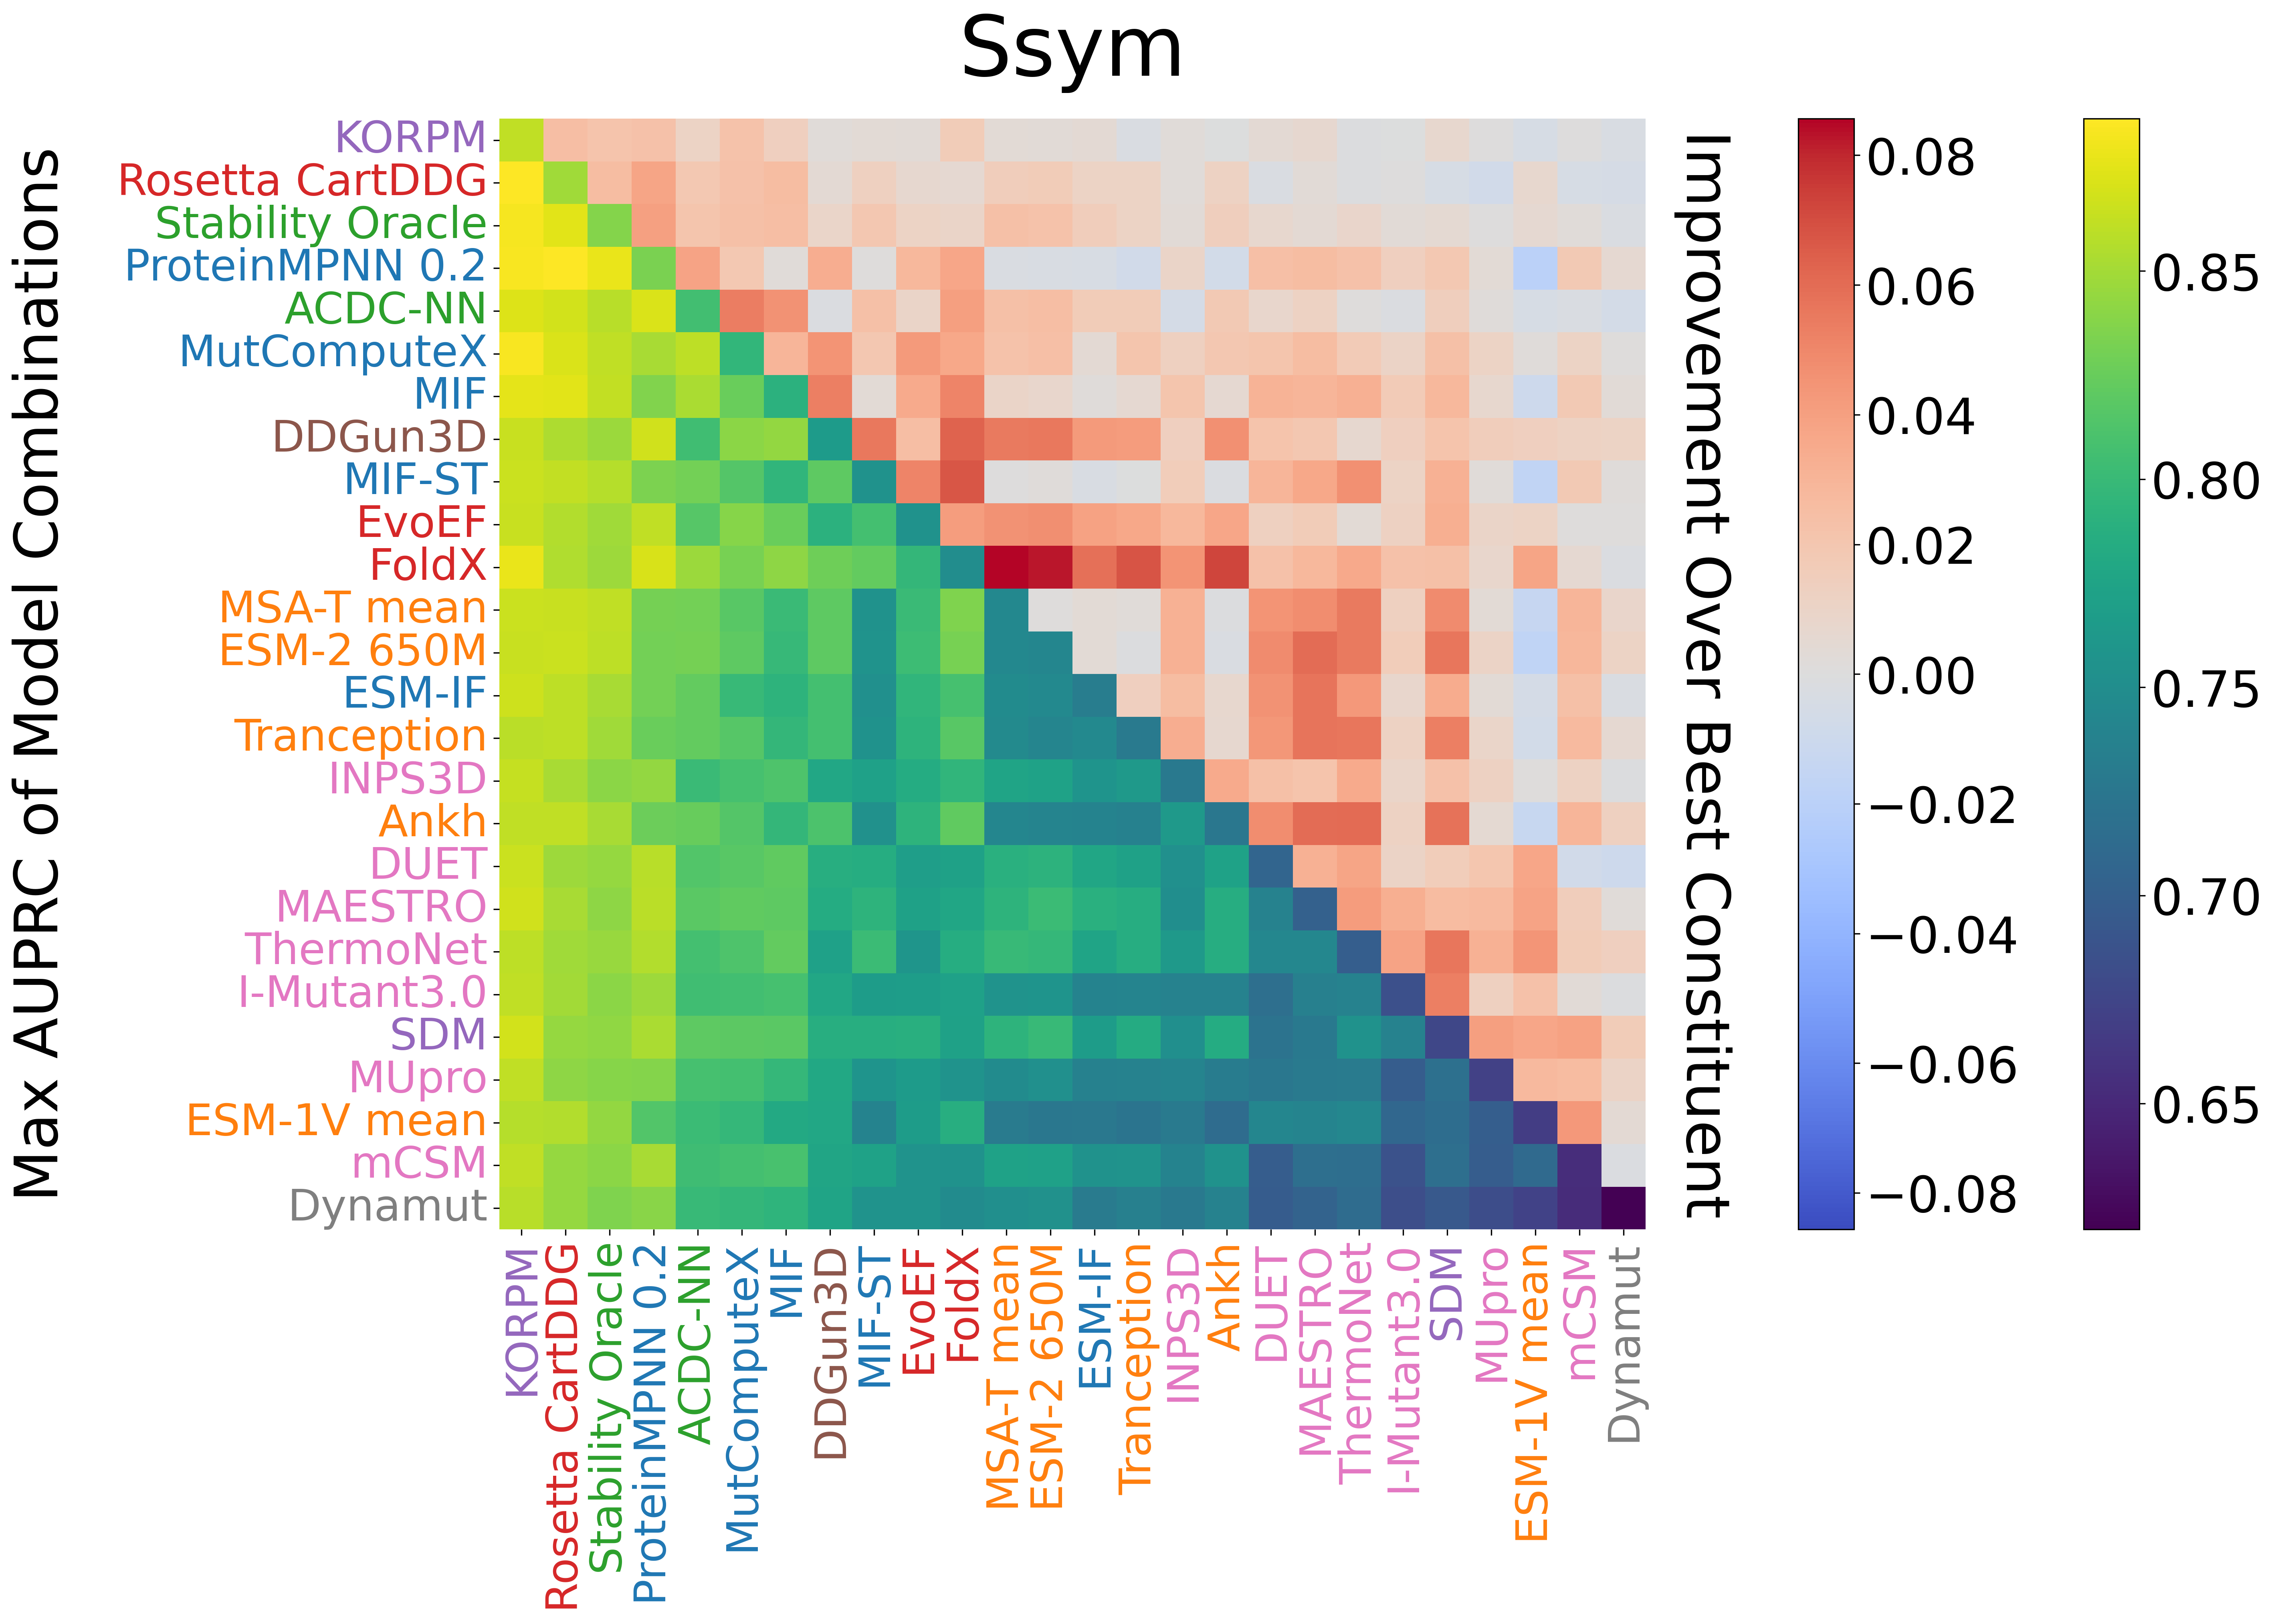

Base model       Added Model  Weight  AUPRC  Model Correlation  \
Rank                                                                         
1      Rosetta CartDDG   ProteinMPNN 0.2     0.5   0.89               0.63   
2                KORPM   Rosetta CartDDG     1.0   0.89               0.66   
3                KORPM   ProteinMPNN 0.2     0.5   0.88               0.71   
4                KORPM       MutComputeX     0.5   0.88               0.45   
5                KORPM  Stability Oracle     1.0   0.88               0.66   
6                KORPM             FoldX     0.5   0.88               0.45   
7      ProteinMPNN 0.2  Stability Oracle     1.0   0.88               0.60   
8                KORPM               MIF     0.5   0.88               0.59   
9      Rosetta CartDDG               MIF     0.5   0.87               0.57   
10     Rosetta CartDDG  Stability Oracle     1.0   0.87               0.68   
11               KORPM           ACDC-NN     0.5   0.87               0.68   
12     Rosetta CartDDG       MutComputeX     0.5   0.87               0.48   
13             ACDC-NN   ProteinMPNN 0.2     1.0   0.87               0.58   
14               FoldX   ProteinMPNN 0.2     1.0   0.87               0.48   
15             ACDC-NN   Rosetta CartDDG     1.0   0.87               0.60   
16               KORPM               SDM     0.2   0.87               0.32   
17               KORPM           MAESTRO     0.2   0.87               0.41   
18             DDGun3D   ProteinMPNN 0.2     1.0   0.87               0.47   
19               KORPM            ESM-IF     0.2   0.87               0.59   
20     Rosetta CartDDG        ESM-2 650M     0.2   0.87               0.42   
21               KORPM              DUET     0.2   0.87               0.41   
22               KORPM            MIF-ST     0.2   0.87               0.67   
23               KORPM        MSA-T mean     0.2   0.86               0.66   
24               KORPM             EvoEF     0.2   0.86               0.57   
25               KORPM        ESM-2 650M     0.2   0.86               0.66   
26               KORPM           DDGun3D     0.2   0.86               0.68   
27     Rosetta CartDDG        MSA-T mean     0.2   0.86               0.44   
28               KORPM            INPS3D     0.2   0.86               0.55   
29    Stability Oracle               MIF     0.5   0.86               0.55   
30     Rosetta CartDDG            MIF-ST     0.2   0.86               0.51   

      CPU time (s)  GPU time (s)  
Rank                              
1         125192.0          5.98  
2         125192.0         -0.00  
3             -0.0          5.98  
4             -0.0         -0.00  
5             -0.0         -0.00  
6             -0.0         -0.00  
7             -0.0          5.98  
8             -0.0          6.58  
9         125192.0          6.58  
10        125192.0         -0.00  
11            -0.0         -0.00  
12        125192.0         -0.00  
13            -0.0          5.98  
14            -0.0          5.98  
15        125192.0         -0.00  
16            -0.0         -0.00  
17            -0.0         -0.00  
18            -0.0          5.98  
19            -0.0         87.41  
20        125192.0         31.94  
21            -0.0         -0.00  
22            -0.0         21.79  
23            -0.0       4845.43  
24            -0.0         -0.00  
25            -0.0         31.94  
26            -0.0         -0.00  
27        125192.0       4845.43  
28            -0.0         -0.00  
29            -0.0          6.58  
30        125192.0         21.79

In [14]:
direction = 'combined'
statistic = 'auprc'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df, fig = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

In [15]:
supp = d1.xs('dir')[['auprc', 'mean_stabilization', 'net_stabilization', 'weighted_ndcg', 'weighted_spearman', 'auppc', 'aumsc', 'antisymmetry', 'bias']].reset_index().drop(['model_type', 'class'], axis=1)#.set_index('model')
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='dir')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='dir')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='dir')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

22


Model 1          Model 2  Weight 2     wNDCG     AUPPC  \
131  I-Mutant3.0-Seq          Dynamut       0.2  0.842641  0.061301   
167  I-Mutant3.0-Seq           PremPS       0.2  0.839730  0.063438   
53   I-Mutant3.0-Seq          ACDC-NN       0.5  0.838460  0.067922   
31   I-Mutant3.0-Seq  Rosetta CartDDG       0.2  0.838190  0.063948   
168  I-Mutant3.0-Seq              SDM       0.2  0.835371  0.059729   
173  I-Mutant3.0-Seq            KORPM       0.2  0.834401  0.067433   
165  I-Mutant3.0-Seq           INPS3D       0.5  0.834074  0.067659   
113  I-Mutant3.0-Seq             DUET       0.2  0.834008  0.060566   
166  I-Mutant3.0-Seq          MAESTRO       0.2  0.831889  0.061905   
30       I-Mutant3.0  Rosetta CartDDG       1.0  0.831853  0.061043   
17             FoldX            KORPM       1.0  0.738916  0.067654   
94   I-Mutant3.0-Seq          DDGun3D       0.2  0.828396  0.067247   
181          MAESTRO           INPS3D       0.5  0.772583  0.067187   
149      I-Mutant3.0           INPS3D       0.5  0.816099  0.066689   
183           INPS3D              SDM       0.5  0.737630  0.066487   
32   Rosetta CartDDG           INPS3D       0.2  0.770819  0.066429   
25   Rosetta CartDDG          ACDC-NN       0.2  0.765847  0.066295   
7        I-Mutant3.0            FoldX       0.5  0.775538  0.056479   
8    I-Mutant3.0-Seq            FoldX       0.2  0.808415  0.063889   
5               DUET            FoldX       0.5  0.730514  0.042453   
40   Rosetta CartDDG            KORPM       0.2  0.767821  0.065083   
21             FoldX  ProteinMPNN 0.2       0.5  0.721119  0.046795   

     Net Stabilization  
131             23.490  
167             37.020  
53              24.040  
31              30.151  
168             21.231  
173             23.100  
165             25.001  
113             27.740  
166             22.701  
30              32.481  
17              32.760  
94              18.940  
181             10.000  
149             21.391  
183              6.851  
32              23.851  
25              20.191  
7               30.920  
8               29.430  
5               29.190  
40              28.691  
21              26.420

In [16]:
supp = d1.xs('combined')[['auprc', 'weighted_ndcg', 'weighted_spearman', 'mean_stabilization', 'net_stabilization', 'auppc', 'aumsc']].reset_index().drop(['model_type', 'class'], axis=1)
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

26


Model 1                Model 2  Weight 2     wNDCG     AUPPC  \
202            KORPM                MAESTRO       0.5  0.896518  0.447761   
40   Rosetta CartDDG                  KORPM       0.5  0.884911  0.454668   
96           DDGun3D                MAESTRO       0.5  0.880485  0.429935   
33   Rosetta CartDDG                MAESTRO       0.5  0.880379  0.425786   
76             DDGun                MAESTRO       0.5  0.880253  0.436462   
45   Rosetta CartDDG             MSA-T mean       0.2  0.880244  0.457445   
43   Rosetta CartDDG                 MIF-ST       0.2  0.880185  0.449933   
32   Rosetta CartDDG                 INPS3D       0.2  0.879292  0.436617   
2            ACDC-NN                  FoldX       0.5  0.878050  0.451317   
39   Rosetta CartDDG                 ESM-IF       0.2  0.877129  0.436873   
66           ACDC-NN        ProteinMPNN 0.2       1.0  0.872726  0.471603   
67           ACDC-NN             MSA-T mean       0.5  0.858144  0.469184   
87             DDGun        ProteinMPNN 0.2       1.0  0.856726  0.465836   
107          DDGun3D        ProteinMPNN 0.2       0.5  0.866001  0.465340   
65           ACDC-NN                 MIF-ST       0.5  0.861070  0.461690   
64           ACDC-NN                    MIF       0.2  0.860277  0.461334   
68           ACDC-NN  Tranception (reduced)       0.5  0.828952  0.460965   
62           ACDC-NN                  KORPM       0.2  0.845303  0.459207   
88             DDGun             MSA-T mean       1.0  0.855611  0.458686   
108          DDGun3D             MSA-T mean       0.5  0.849584  0.458246   
17             FoldX                  KORPM       1.0  0.866992  0.440520   
275            KORPM                 MIF-ST       1.0  0.841979  0.448530   
278            KORPM  Tranception (reduced)       1.0  0.811466  0.444988   
295       MSA-T mean        ProteinMPNN 0.2       0.5  0.805406  0.449684   
288       MSA-T mean                    MIF       0.2  0.813188  0.438644   
103          DDGun3D                  KORPM       1.0  0.846544  0.446783   

     Net Stabilization  
202            320.571  
40             349.913  
96             237.352  
33             276.083  
76             251.351  
45             337.181  
43             321.463  
32             289.412  
2              320.161  
39             291.423  
66             342.343  
67             343.161  
87             338.592  
107            337.593  
65             318.133  
64             316.683  
68             336.121  
62             350.403  
88             338.641  
108            341.381  
17             352.481  
275            346.702  
278            344.751  
295            343.501  
288            342.511  
103            342.121